## 숫자 이미지를 직접 만들어서 분류 해보자

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

##### Softmax 함수 구현

In [61]:
def Softmax(x):
    x = np.subtract(x,np.max(x)) # prevent overflow??????
    ex = np.exp(x)
    
    return ex / np.sum(ex)

##### 숫자 1,2,3,4,5 이미지 만들기

In [62]:
X = np.zeros((5,5,5))

X[:, :, 0] =  [ [0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0] ]
X[:, :, 1] =  [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1] ]
X[:, :, 2] =  [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]
X[:, :, 3] =  [ [0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0] ]
X[:, :, 4] =  [ [1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]

##### 라벨 1 ~ 5

In [63]:
D = np.array([
    [ [1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]
])

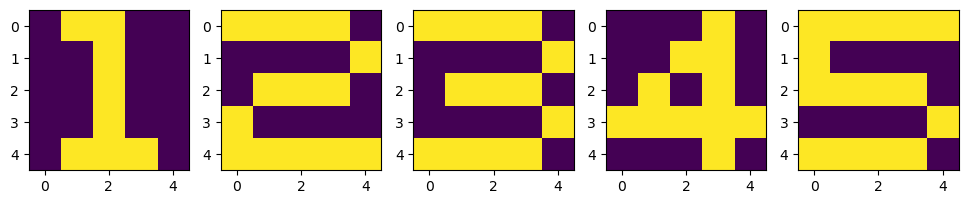

In [64]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1,5,n+1)
    plt.imshow(X[:,:,n])
    
plt.show()

##### ReLU 함수 만들기

In [65]:
def ReLU(x):
    return np.maximum(0,x)

##### ReLU를 이용한 정방향 계산 ( 순방향 추론 )

In [66]:
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y, v1, v2, v3, y1, y2, y3

##### 역전파 (W를 업데이트 하려면 delta를 계산해야함)

In [67]:
## 입력단 -> 1 -> 2 -> 3 -> 출력단
##        W1   W2   W3   W4

def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    # cross entropy
    e = d - y
    delta = e
    
    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3
    
    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1
    
    return delta, delta1, delta2, delta3

##### 가중치 계산

In [68]:
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4
    
    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3
    
    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2
    
    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1
    
    return W1, W2, W3, W4

##### 가중치 업데이트

In [69]:
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:,:,k], (25,1))
        d = D[k,:].T
        
         # 출력단 계산
        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1,W2,W3,W4,x) 
        
         # 역전파 델타 계산
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d,y,W2,W3,W4,v1,v2,v3)
        
         # 가중치 계산 후 업데이트
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)
        
    return W1, W2, W3, W4

##### 학습 시작

In [70]:
# 입력은 25개 -> 20으로 줄여
# 20 -> 20 층 반복
# 20 -> 5개의 출력 (1 ~ 5 추론)

W1 = 2*np.random.random((20,25)) - 1
W2 = 2*np.random.random((20,20)) - 1
W3 = 2*np.random.random((20,20)) - 1
W4 = 2*np.random.random((5,20)) - 1

alpha = 0.01
epochs = 10000

for epoch in tqdm(range(epochs)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [71]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y

In [72]:
N = 5

for k in range(N):
    x = np.reshape(X[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    print('실제 Y = {}'.format(k+1))
    print('예측 Y =',np.argmax(y, axis=0) + 1)
    print('----------------------')
    print(y)
    print('----------------------')

실제 Y = 1
예측 Y = [1]
----------------------
[[9.99958980e-01]
 [2.05426054e-05]
 [6.62875760e-06]
 [8.11987122e-06]
 [5.72841443e-06]]
----------------------
실제 Y = 2
예측 Y = [2]
----------------------
[[1.49959210e-05]
 [9.99971450e-01]
 [1.34475291e-05]
 [8.37437633e-08]
 [2.23752237e-08]]
----------------------
실제 Y = 3
예측 Y = [3]
----------------------
[[1.53628551e-06]
 [1.82047262e-05]
 [9.99969198e-01]
 [8.53351587e-09]
 [1.10522481e-05]]
----------------------
실제 Y = 4
예측 Y = [4]
----------------------
[[3.61492786e-06]
 [5.26326983e-07]
 [7.74539928e-07]
 [9.99992229e-01]
 [2.85538915e-06]]
----------------------
실제 Y = 5
예측 Y = [5]
----------------------
[[2.96504648e-06]
 [4.54768455e-07]
 [8.45651412e-06]
 [2.75368347e-07]
 [9.99987848e-01]]
----------------------


- 학습은 매우 잘 된 것 같다.
- 이제 테스트 데이터를 만들어서 학습시켜 보자

In [73]:
X_test = np.zeros((5,5,5))

X_test[:, :, 0] =  [ [0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0] ]
X_test[:, :, 1] =  [ [1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]
X_test[:, :, 2] =  [ [0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0] ]
X_test[:, :, 3] =  [ [1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,0,0] ]
X_test[:, :, 4] =  [ [0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0] ]

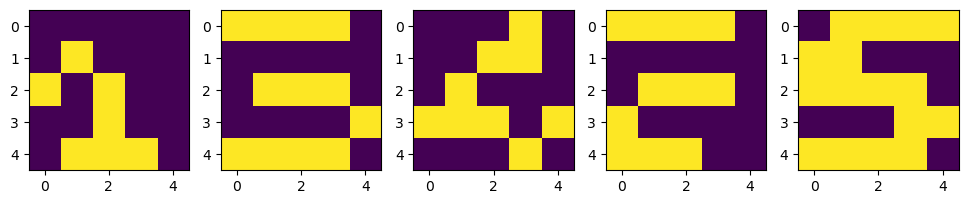

In [74]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1,5,n+1)
    plt.imshow(X_test[:,:,n])
    
plt.show()

In [75]:
learning_result = [0,0,0,0,0]

N = 5

for k in range(N):
    x = np.reshape(X_test[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0) + 1
    
    print('실제 Y = {}'.format(k+1))
    print('예측 Y =',np.argmax(y, axis=0) + 1)
    print('----------------------')
    print(y)
    print('----------------------')

실제 Y = 1
예측 Y = [2]
----------------------
[[3.80016469e-01]
 [5.17680482e-01]
 [9.59845291e-05]
 [2.13759678e-02]
 [8.08310965e-02]]
----------------------
실제 Y = 2
예측 Y = [3]
----------------------
[[2.70981190e-03]
 [5.12136799e-04]
 [9.79506007e-01]
 [2.50564160e-06]
 [1.72695386e-02]]
----------------------
실제 Y = 3
예측 Y = [4]
----------------------
[[2.27173534e-07]
 [2.72880930e-07]
 [4.79319912e-07]
 [9.99997545e-01]
 [1.47537718e-06]]
----------------------
실제 Y = 4
예측 Y = [2]
----------------------
[[9.65365146e-04]
 [9.98958219e-01]
 [7.51777813e-05]
 [1.14124032e-06]
 [9.65222853e-08]]
----------------------
실제 Y = 5
예측 Y = [5]
----------------------
[[1.42395469e-05]
 [1.16019172e-07]
 [3.35225499e-09]
 [9.50877018e-06]
 [9.99976132e-01]]
----------------------


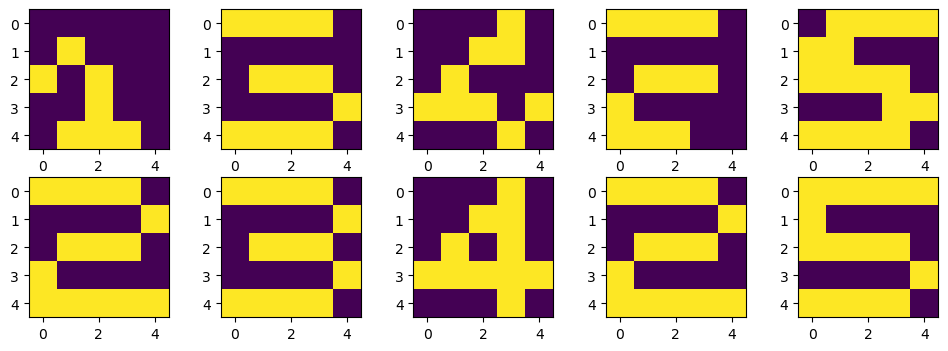

In [76]:
plt.figure(figsize=(12,4))
for k in range(5):
    plt.subplot(2,5,k+1)
    plt.imshow(X_test[:,:,k])
    plt.subplot(2,5,k+6)
    plt.imshow(X[:,:,learning_result[k][0]-1])
    
plt.show()

##### dropout

In [87]:
y = np.array([0.1, 0.2, 0.5, 0.8, 0.8, 0.8, 0.8, 0.8,])


# 총 개수, 80% 제거 한 개수, 80% 제거 한 개수의 정수형
y.size, y.size*(1-0.8), round(y.size*(1-0.8))

(8, 1.5999999999999996, 2)

In [88]:
num = round(y.size*(1-0.8))
np.random.choice(y.size, num) # num 개수 만큼 인덱스 번호 추출

array([5, 7])

In [89]:
def Dropout(y, ratio):
    ym = np.zeros_like(y)
    
    num = round(y.size*(1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    ym[idx] = 1.0 / (1.0 - ratio)
    
    return ym

In [90]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [91]:
def calcOutput_Dropuout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1*Dropout(y1, 0.2)
    
    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y2 = y2*Dropout(y2, 0.2)
    
    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3*Dropout(y3, 0.2)
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y, v1, v2, v3, y1, y2, y3

In [96]:
## 입력단 -> 1 -> 2 -> 3 -> 출력단
##        W1   W2   W3   W4

def backpropagation_Dropuout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    # cross entropy
    e = d - y
    delta = e
    
    e3 = np.matmul(W4.T, delta)
    delta3 = y3*(1-y3) * e3
    
    e2 = np.matmul(W3.T, delta3)
    delta2 = y2*(1-y2) * e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = y1*(1-y1) * e1
    
    return delta, delta1, delta2, delta3

In [97]:
def DeepDropuout(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:,:,k], (25,1))
        d = D[k,:].T
        
         # 출력단 계산
        y, v1, v2, v3, y1, y2, y3 = calcOutput_Dropuout(W1,W2,W3,W4,x) 
        
         # 역전파 델타 계산
        delta, delta1, delta2, delta3 = backpropagation_Dropuout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        
         # 가중치 계산 후 업데이트
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)
        
    return W1, W2, W3, W4

In [98]:
# 입력은 25개 -> 20으로 줄여
# 20 -> 20 층 반복
# 20 -> 5개의 출력 (1 ~ 5 추론)

W1 = 2*np.random.random((20,25)) - 1
W2 = 2*np.random.random((20,20)) - 1
W3 = 2*np.random.random((20,20)) - 1
W4 = 2*np.random.random((5,20)) - 1

alpha = 0.01
epochs = 10000

for epoch in tqdm(range(epochs)):
    W1, W2, W3, W4 = DeepDropuout(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [99]:
learning_result = [0,0,0,0,0]

N = 5

for k in range(N):
    x = np.reshape(X_test[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0) + 1
    
    print('실제 Y = {}'.format(k+1))
    print('예측 Y =',np.argmax(y, axis=0) + 1)
    print('----------------------')
    print(y)
    print('----------------------')

실제 Y = 1
예측 Y = [1]
----------------------
[[1.00000000e+00]
 [6.89763953e-22]
 [3.26784997e-57]
 [7.32862122e-45]
 [4.72087812e-27]]
----------------------
실제 Y = 2
예측 Y = [5]
----------------------
[[7.89289970e-30]
 [4.58986967e-15]
 [4.75586205e-03]
 [3.30144410e-30]
 [9.95244138e-01]]
----------------------
실제 Y = 3
예측 Y = [4]
----------------------
[[1.00155769e-07]
 [3.66342791e-21]
 [6.51729472e-21]
 [9.99999900e-01]
 [1.73356794e-11]]
----------------------
실제 Y = 4
예측 Y = [5]
----------------------
[[5.03090497e-17]
 [4.93241931e-01]
 [2.72495006e-03]
 [9.33399749e-23]
 [5.04033119e-01]]
----------------------
실제 Y = 5
예측 Y = [5]
----------------------
[[4.30875836e-32]
 [4.39257965e-13]
 [1.81691911e-16]
 [5.55281076e-46]
 [1.00000000e+00]]
----------------------


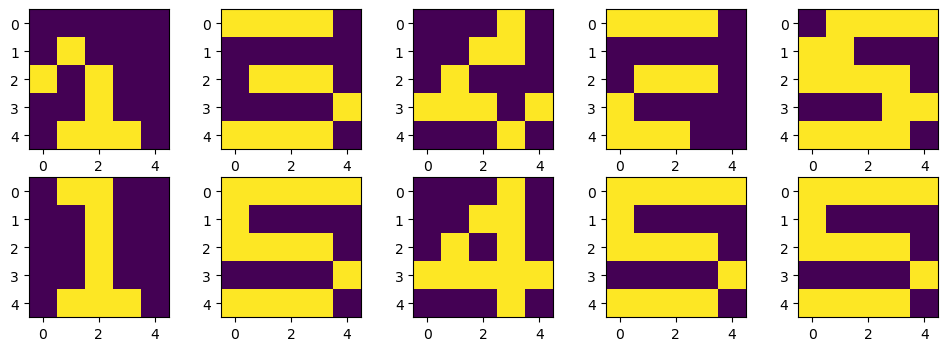

In [100]:
plt.figure(figsize=(12,4))
for k in range(5):
    plt.subplot(2,5,k+1)
    plt.imshow(X_test[:,:,k])
    plt.subplot(2,5,k+6)
    plt.imshow(X[:,:,learning_result[k][0]-1])
    
plt.show()